<a href="https://colab.research.google.com/github/sheebanadeem/MindMesh_flask-api/blob/main/cats_v_dogs_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/



cp: cannot stat 'kaggle.json': No such file or directory


In [16]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [17]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [19]:
# generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)



Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [20]:
# Normalize
def process(image,labels):
  image=tf.cast(image/255.,tf.float32)
  return image,label

  train_ds=train_ds.map(process)
  validation_ds=validation_ds.map(process)

In [21]:
# create CNN model

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [22]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [24]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds )

Epoch 1/10
625/625 [==============================] - 71s 108ms/step - loss: 1.3737 - accuracy: 0.5809 - val_loss: 0.6361 - val_accuracy: 0.6186
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5886 - accuracy: 0.6911 - val_loss: 0.5236 - val_accuracy: 0.7430
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4984 - accuracy: 0.7610 - val_loss: 0.5203 - val_accuracy: 0.7510
Epoch 4/10
625/625 [==============================] - 64s 103ms/step - loss: 0.4394 - accuracy: 0.7961 - val_loss: 0.4908 - val_accuracy: 0.7582
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3704 - accuracy: 0.8336 - val_loss: 0.4384 - val_accuracy: 0.7942
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3040 - accuracy: 0.8690 - val_loss: 0.6242 - val_accuracy: 0.7478
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2406 - accuracy: 0.8978 - val_loss: 0.4474 - val_ac

In [25]:
import cv2


In [41]:
test_img=cv2.imread('/content/cat.jpg')

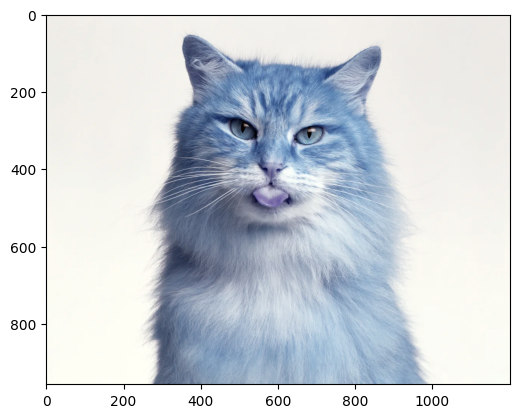

In [42]:
import matplotlib.pyplot as pl

pl.imshow(test_img)

In [43]:
test_img.shape

(957, 1200, 3)

In [44]:
test_img=cv2.resize(test_img,(256,256))

In [45]:
test_input=test_img.reshape((1,256,256,3))

In [46]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.00507744]], dtype=float32)